Dantar Alejandro Ortiz Vega 

Jose Ramon Preciado Torres

Agentes Inteligentes

Profesor: Apolinar Gonzales Potes

In [2]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 

with open('NuevosDat.txt') as file:
    datos = file.readlines()

data = [json.loads(linea.strip()) for linea in datos]

data_dict = {'ID': [dato['id'] for dato in data],'action':[dato['action']for dato in data], 'Values': [dato['valor'] for dato in data]}

df = pd.DataFrame(data_dict)

df


ID  action     Values
0    7    20.0  24.191442
1    8    20.0  23.993428
2    9    20.0  23.744040
3   10    20.0  23.631438
4   11    20.0  23.259205
..  ..     ...        ...
62  69    30.0  29.025835
63  70    30.0  29.019234
64  71    30.0  29.044260
65  72    30.0  29.390664
66  73    30.0  29.198830

[67 rows x 3 columns]

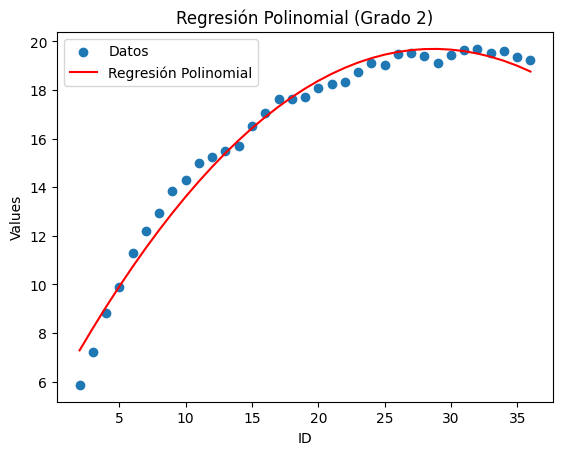

In [2]:
#Grado del polinomio
degree = 2 

coefficients = np.polyfit(df['ID'], df['Values'], degree)
poly_function = np.poly1d(coefficients)

# Gráfico de los datos y la función polinomial
plt.scatter(df['ID'], df['Values'], label='Datos')
plt.plot(df['ID'], poly_function(df['ID']), color='red', label='Regresión Polinomial')
plt.xlabel('ID')
plt.ylabel('Values')
plt.title('Regresión Polinomial (Grado {})'.format(degree))
plt.legend()
plt.show()


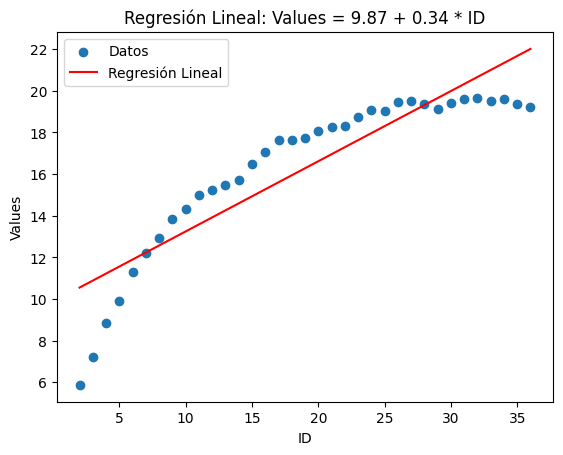

In [3]:
model = LinearRegression()
model.fit(df[['ID']], df['Values'])

# Coeficientes
intercept = model.intercept_
slope = model.coef_[0]

# Gráfico de los datos y la regresión lineal
plt.scatter(df['ID'], df['Values'], label='Datos')
plt.plot(df['ID'], model.predict(df[['ID']]), color='red', label='Regresión Lineal')
plt.xlabel('ID')
plt.ylabel('Values')
plt.title('Regresión Lineal: Values = {} + {} * ID'.format(round(intercept, 2), round(slope, 2)))
plt.legend()
plt.show()

In [4]:
# Muestra la función polinomial
print("Función polinomial obtenida:")
print(poly_function)

# El 2 representa x al cuadrado

Función polinomial obtenida:
          2
-0.01741 x + 0.9989 x + 5.363


In [5]:
# Muestra la función de regresión lineal
print("Función de regresión lineal:")
print("Values = {} + {} * ID".format(intercept, slope))

Función de regresión lineal:
Values = 9.872472780125818 + 0.33729070646142445 * ID
